In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
# conda install -c conda-forge mlxtend
#The Apriori algorithm is considered one of the most basic Association Rule Mining algorithms. It works on the principle that “ Having prior knowledge of frequent itemsets can generate strong association rules. ” The word Apriori means prior knowledge.

In [31]:
Movies = pd.read_csv("my_movies.csv") #my_movies.csv  -- book.csv
Book = pd.read_csv("book.csv")

In [3]:
Movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [32]:
import numpy as np

In [10]:
Movies['V1'].unique()

array(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1'], dtype=object)

In [11]:
Movies['V2'].unique()

array(['LOTR1', 'Patriot', 'LOTR2', 'Harry Potter2', 'LOTR'], dtype=object)

In [12]:
Movies['V3'].unique()

array(['Harry Potter1', 'Braveheart', nan, 'Sixth Sense', 'Gladiator'],
      dtype=object)

In [13]:
Movies['V4'].unique()

array(['Green Mile', nan], dtype=object)

In [14]:
Movies['V5'].unique()

array(['LOTR2', nan], dtype=object)

In [33]:
Movies_df = Movies.iloc[:, 0:5]
Movies_df

,V1,V2,V3,V4,V5
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2
1,Gladiator,Patriot,Braveheart,NaN,NaN
2,LOTR1,LOTR2,NaN,NaN,NaN
3,Gladiator,Patriot,Sixth Sense,NaN,NaN
4,Gladiator,Patriot,Sixth Sense,NaN,NaN
5,Gladiator,Patriot,Sixth Sense,NaN,NaN
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN
7,Gladiator,Patriot,NaN,NaN,NaN
8,Gladiator,Patriot,Sixth Sense,NaN,NaN
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN


In [34]:
Movies_df_dummies = pd.get_dummies(Movies_df)
Movies_df_dummies

,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0


In [35]:
Movies_frequent_itemsets = apriori(Movies_df_dummies, min_support=0.1, use_colnames=True)
Movies_frequent_itemsets
#The support count can only speak for the frequency of an itemset. It does not take into account relative frequency i.e., the frequency with respect to the number of transactions. This is called the support of an itemset.
#Support (Itemset) = Frequency of Itemset (Support count) / Total No. of Transactions

#min_support - Defining support as percentage helps us set a threshold for frequency; eliminate those items whose support is less than min_support


,support,itemsets
0,0.6,(V1_Gladiator)
1,0.1,(V1_Harry Potter1)
2,0.1,(V1_LOTR1)
3,0.2,(V1_Sixth Sense)
4,0.1,(V2_Harry Potter2)
5,0.1,(V2_LOTR)
6,0.1,(V2_LOTR1)
7,0.1,(V2_LOTR2)
8,0.6,(V2_Patriot)
9,0.1,(V3_Braveheart)


In [36]:
Movie_rules = association_rules(Movies_frequent_itemsets, metric="lift", min_threshold=0.7)
Movie_rules
#Confidence measures the occurence of products together in a dataset.
#Confidence(A→B) = (Transactions containing both (A and B))/(Transactions containing A)
#Confidence(A => B) = Support Count(A,B) / Support Count A
#The confidence of a rule A->C is the probability of seeing the consequent in a transaction given that it also contains the antecedent. Note that the metric is not symmetric or directed; for instance, the confidence for A->C is different than the confidence for C->A. The confidence is 1 (maximal) for a rule A->C if the consequent and antecedent always occur together.

#Lift Ratio = Confidence / (Benchmark Confidence); 
#Lift(A→B) = (Confidence (A→B))/(Support (B))
#The lift metric is commonly used to measure how much more often the antecedent and consequent of a rule A->C occur together than we would expect if they were statistically independent. If A and C are independent, the Lift score will be exactly 1.

#levarage(A→B)=support(A→B)−support(A)×support(B),range: [−1,1]
#A leverage value of 0 indicates independence.

#conviction(A→B) = (1−support(C)) / (1−confidence(A→B)), range: [0,∞]
#A high conviction value means that the consequent is highly depending on the antecedent.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(V1_Gladiator),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(V2_Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
2,(V1_Gladiator),(V3_Braveheart),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
3,(V3_Braveheart),(V1_Gladiator),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
4,(V3_Sixth Sense),(V1_Gladiator),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
249,(V4_Green Mile),"(V5_LOTR2, V2_LOTR1, V3_Harry Potter1, V1_Sixt...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
250,(V2_LOTR1),"(V5_LOTR2, V4_Green Mile, V3_Harry Potter1, V1...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
251,(V1_Sixth Sense),"(V5_LOTR2, V2_LOTR1, V4_Green Mile, V3_Harry P...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
252,(V5_LOTR2),"(V2_LOTR1, V4_Green Mile, V3_Harry Potter1, V1...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [21]:
Movie_rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
127,(V5_LOTR2),"(V3_Harry Potter1, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
168,"(V1_Sixth Sense, V3_Harry Potter1, V2_LOTR1)",(V5_LOTR2),0.1,0.1,0.1,1.0,10.0,0.09,inf
151,(V3_Gladiator),"(V1_Sixth Sense, V2_LOTR, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
152,(V2_LOTR),"(V1_Sixth Sense, V3_Gladiator, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
155,"(V1_Sixth Sense, V3_Harry Potter1, V4_Green Mile)",(V2_LOTR1),0.1,0.1,0.1,1.0,10.0,0.09,inf
156,"(V1_Sixth Sense, V2_LOTR1, V4_Green Mile)",(V3_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
158,"(V1_Sixth Sense, V3_Harry Potter1)","(V2_LOTR1, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
159,"(V1_Sixth Sense, V2_LOTR1)","(V3_Harry Potter1, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
162,"(V3_Harry Potter1, V4_Green Mile)","(V1_Sixth Sense, V2_LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
163,"(V2_LOTR1, V4_Green Mile)","(V1_Sixth Sense, V3_Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [23]:
Movie_rules[Movie_rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(V1_Gladiator),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(V2_Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
2,(V1_Gladiator),(V3_Braveheart),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
3,(V3_Braveheart),(V1_Gladiator),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
4,(V1_Gladiator),(V3_Sixth Sense),0.6,0.4,0.4,0.666667,1.666667,0.16,1.80
...,...,...,...,...,...,...,...,...,...
249,(V3_Harry Potter1),"(V1_Sixth Sense, V5_LOTR2, V2_LOTR1, V4_Green ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
250,(V2_LOTR1),"(V1_Sixth Sense, V3_Harry Potter1, V5_LOTR2, V...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
251,(V4_Green Mile),"(V1_Sixth Sense, V3_Harry Potter1, V2_LOTR1, V...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
252,(V1_Sixth Sense),"(V3_Harry Potter1, V5_LOTR2, V2_LOTR1, V4_Gree...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


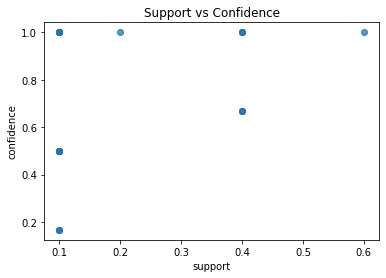

In [37]:
plt.scatter(Movie_rules['support'], Movie_rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

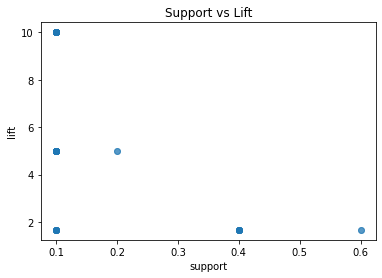

In [38]:
plt.scatter(Movie_rules['support'], Movie_rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

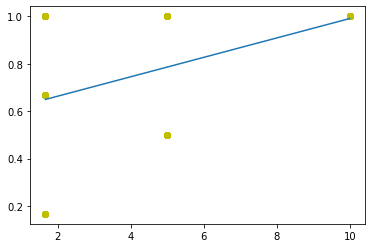

In [39]:
fit = np.polyfit(Movie_rules['lift'], Movie_rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(Movie_rules['lift'], Movie_rules['confidence'], 'yo', Movie_rules['lift'], 
 fit_fn(Movie_rules['lift']))

In [24]:
Book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [41]:
Book_frequent_itemsets = apriori(Book, min_support=0.1, use_colnames=True)
Book_frequent_itemsets
#The support count can only speak for the frequency of an itemset. It does not take into account relative frequency i.e., the frequency with respect to the number of transactions. This is called the support of an itemset.
#Support (Itemset) = Frequency of Itemset (Support count) / Total No. of Transactions

#min_support - Defining support as percentage helps us set a threshold for frequency; eliminate those items whose support is less than min_support


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [42]:
Book_rules = association_rules(Book_frequent_itemsets, metric="lift", min_threshold=0.7)
Book_rules
#Confidence measures the occurence of products together in a dataset.
#Confidence(A→B) = (Transactions containing both (A and B))/(Transactions containing A)
#Confidence(A => B) = Support Count(A,B) / Support Count A
#The confidence of a rule A->C is the probability of seeing the consequent in a transaction given that it also contains the antecedent. Note that the metric is not symmetric or directed; for instance, the confidence for A->C is different than the confidence for C->A. The confidence is 1 (maximal) for a rule A->C if the consequent and antecedent always occur together.

#Lift Ratio = Confidence / (Benchmark Confidence); 
#Lift(A→B) = (Confidence (A→B))/(Support (B))
#The lift metric is commonly used to measure how much more often the antecedent and consequent of a rule A->C occur together than we would expect if they were statistically independent. If A and C are independent, the Lift score will be exactly 1.

#levarage(A→B)=support(A→B)−support(A)×support(B),range: [−1,1]
#A leverage value of 0 indicates independence.

#conviction(A→B) = (1−support(C)) / (1−confidence(A→B)), range: [0,∞]
#A high conviction value means that the consequent is highly depending on the antecedent.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [27]:
Book_rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
82,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
99,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
94,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [28]:
Book_rules[Book_rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


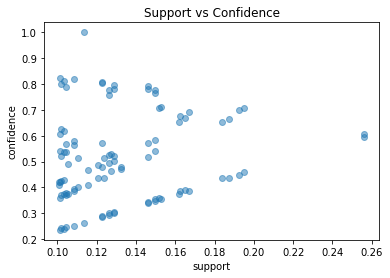

In [43]:
plt.scatter(Book_rules['support'], Book_rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

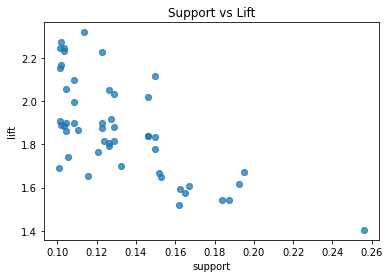

In [44]:
plt.scatter(Book_rules['support'], Book_rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

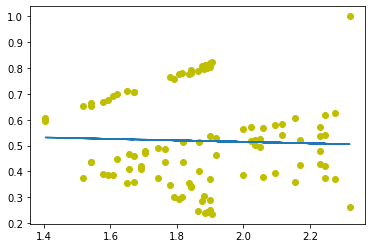

In [45]:
fit = np.polyfit(Book_rules['lift'], Book_rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(Book_rules['lift'], Book_rules['confidence'], 'yo', Book_rules['lift'], 
 fit_fn(Book_rules['lift']))

In [3]:
Movies = pd.read_csv("my_movies.csv")

In [4]:
Movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [5]:
Movies_0ther = Movies.iloc[:, 5:]
Movies_0ther

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [6]:
Movies_0ther_frequent_itemsets = apriori(Movies_0ther, min_support=0.1, use_colnames=True)
Movies_0ther_frequent_itemsets
#The support count can only speak for the frequency of an itemset. It does not take into account relative frequency i.e., the frequency with respect to the number of transactions. This is called the support of an itemset.
#Support (Itemset) = Frequency of Itemset (Support count) / Total No. of Transactions

#min_support - Defining support as percentage helps us set a threshold for frequency; eliminate those items whose support is less than min_support


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [7]:
Movies_0ther_frequent_itemsets_rules = association_rules(Movies_0ther_frequent_itemsets, metric="lift", min_threshold=0.7)
Movies_0ther_frequent_itemsets_rules
#Confidence measures the occurence of products together in a dataset.
#Confidence(A→B) = (Transactions containing both (A and B))/(Transactions containing A)
#Confidence(A => B) = Support Count(A,B) / Support Count A
#The confidence of a rule A->C is the probability of seeing the consequent in a transaction given that it also contains the antecedent. Note that the metric is not symmetric or directed; for instance, the confidence for A->C is different than the confidence for C->A. The confidence is 1 (maximal) for a rule A->C if the consequent and antecedent always occur together.

#Lift Ratio = Confidence / (Benchmark Confidence); 
#Lift(A→B) = (Confidence (A→B))/(Support (B))
#The lift metric is commonly used to measure how much more often the antecedent and consequent of a rule A->C occur together than we would expect if they were statistically independent. If A and C are independent, the Lift score will be exactly 1.

#levarage(A→B)=support(A→B)−support(A)×support(B),range: [−1,1]
#A leverage value of 0 indicates independence.

#conviction(A→B) = (1−support(C)) / (1−confidence(A→B)), range: [0,∞]
#A high conviction value means that the consequent is highly depending on the antecedent.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
245,(Sixth Sense),"(Harry Potter1, Green Mile, LOTR1, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
246,(Harry Potter1),"(Sixth Sense, Green Mile, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Green Mile),"(Sixth Sense, Harry Potter1, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(LOTR1),"(Sixth Sense, Harry Potter1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [8]:
Movies_0ther_frequent_itemsets_rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
212,"(Harry Potter1, LOTR2)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
185,"(Green Mile, LOTR1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
226,"(Sixth Sense, Harry Potter1, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
199,"(Harry Potter1, Green Mile)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
196,"(Sixth Sense, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
201,"(Green Mile, LOTR2)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
147,(LOTR),"(Sixth Sense, Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
158,"(Harry Potter1, LOTR1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
183,"(Sixth Sense, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
184,"(Sixth Sense, LOTR2)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [9]:
Movies_0ther_frequent_itemsets_rules[Movies_0ther_frequent_itemsets_rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
245,(Sixth Sense),"(Harry Potter1, Green Mile, LOTR1, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
246,(Harry Potter1),"(Sixth Sense, Green Mile, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Green Mile),"(Sixth Sense, Harry Potter1, LOTR2, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(LOTR1),"(Sixth Sense, Harry Potter1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [10]:
#install and then import matplotlib
import matplotlib.pyplot as plt

In [11]:
#matplotlib to render plots in the notebook
%matplotlib inline

In [17]:
Movies_0ther_support=Movies_0ther_frequent_itemsets_rules['support']
Movies_0ther_support

0      0.5
1      0.5
2      0.1
3      0.1
4      0.1
      ... 
245    0.1
246    0.1
247    0.1
248    0.1
249    0.1
Name: support, Length: 250, dtype: float64

In [18]:
Movies_0ther_confidence=Movies_0ther_frequent_itemsets_rules['confidence']
Movies_0ther_confidence

0      0.833333
1      0.714286
2      0.166667
3      0.500000
4      0.166667
         ...   
245    0.166667
246    0.500000
247    0.500000
248    0.500000
249    0.500000
Name: confidence, Length: 250, dtype: float64

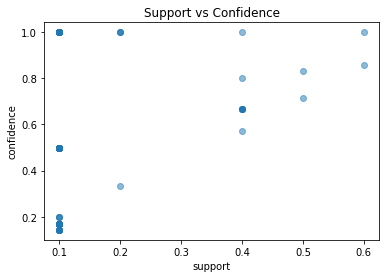

In [25]:
plt.scatter(Movies_0ther_frequent_itemsets_rules['support'], Movies_0ther_frequent_itemsets_rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

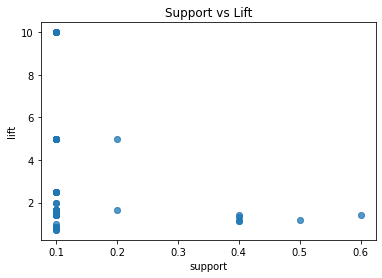

In [29]:
plt.scatter(Movies_0ther_frequent_itemsets_rules['support'], Movies_0ther_frequent_itemsets_rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

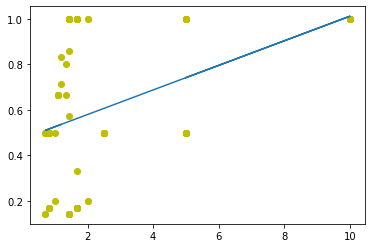

In [30]:
fit = np.polyfit(Movies_0ther_frequent_itemsets_rules['lift'], Movies_0ther_frequent_itemsets_rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(Movies_0ther_frequent_itemsets_rules['lift'], Movies_0ther_frequent_itemsets_rules['confidence'], 'yo', Movies_0ther_frequent_itemsets_rules['lift'], 
 fit_fn(Movies_0ther_frequent_itemsets_rules['lift']))